# Gaussian Processes 1: Preliminaries

We begin with a general definition.

````{prf:definition}
:label: stochastic-process

A stochastic process $f$ is a collection of random variables indexed by $x \in \mathcal{X}$. I.e., 

$$ f = \{ f(x) : x \in \mathcal{X}\} $$
````

In the above definition, $\mathcal{X}$  is an arbitrary indexing set. When modeling real-world
phenomena, we typically assume that $\mathcal{X}$ corresponds to some semantically meaningful concept. For example,
if we want to model some phenomenon over _time_, we could use $\mathcal{X} = \mathbb{R}$ with $x \in \mathcal{X}$
corresponding to an individual point in time. Similarly, if we want to model some phenomenon that varies across
two-dimensional _space_ we could let $\mathcal{X} = \mathbb{R}^2$ with $x \in \mathcal{X}$ now corresponding
to spatial coordinates.

Perhaps the most famous example of a stochastic process is [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion),
originally conceived to model the behavior of particles suspended in a fluid. In short, this process models the
change in a particle's position $p$ over time $x$, where a partical is assumed to move as a result of collisions
with other particles. Omitting the specific mathematical details for now, in the below figure we plot five different paths
simulated according to a Brownian motion process.

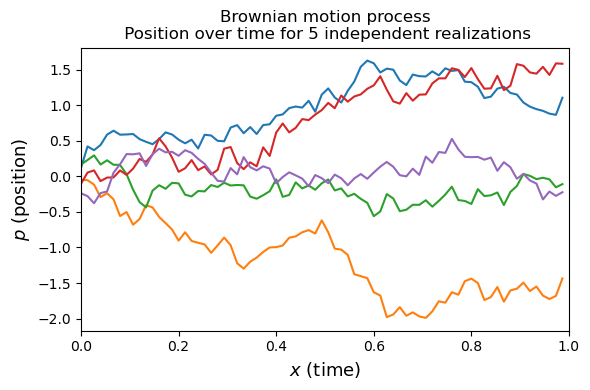

In [1]:
import numpy as np
import matplotlib.pyplot as plt
total_time = 1
nb_steps = 75
delta_t = total_time / nb_steps
nb_processes = 5  # Simulate 5 different motions
mean = 0.  # Mean of each movement
stdev = np.sqrt(delta_t)  # Standard deviation of each movement

# Simulate the brownian motions in a 1D space by cumulatively
#  making a new movement delta_d
distances = np.cumsum(
    # Move randomly from current location to N(0, delta_t)
    np.random.normal(
        mean, stdev, (nb_processes, nb_steps)),
    axis=1)

plt.figure(figsize=(6, 4))
# Make the plots
t = np.arange(0, total_time, delta_t)
for i in range(nb_processes):
    plt.plot(t, distances[i,:])
plt.title((
    'Brownian motion process\n '
    'Position over time for 5 independent realizations'))
plt.xlabel('$x$ (time)', fontsize=13)
plt.ylabel('$p$ (position)', fontsize=13)
plt.xlim([-0, 1])
plt.tight_layout()
plt.show()

From the plot above, we can see that each sample path from the Brownian motion process can be seen as producing
a new function of position versus time. We can thus think of our stochastic process $f$ as representing a _distribution
over functions_ of $x$, which we could sample like any other probability distribution. 

---

When considering real-world phenomena over space, time, etc., we'll typically only have observed samples corresponding
to a finite number of input $x$ values. However, ideally we would be able to make predictions for new inputs $x'$. Moreover,
we might want to do so probabilisticly, so that we can provide measures of uncertainty (e.g. confidence intervals) for our
predictions. At a high-level, one potential way for doing so would be to assume that $f$ is drawn from some prior distribution,
and then apply Bayes rule with our observed data to obtain corresponding posterior distributions over unseen function outputs.
Slightly more formally, letting $\mathbf{f}$ denote a set of observed outputs from our process with corresponding inputs $X$,
and $\mathbf{f}_*$ denote a set of unseen outputs from inputs $X^*$, we would want to compute:

$$
p(\mathbf{f}_* \mid \mathbf{f}) \propto p(\mathbf{f} \mid \mathbf{f}_*)p(\mathbf{f}_*)
$$

However, before proceeding in this direction, we must consider some technical issues. As hinted at previously, for
many real-world scenarios we'll typically assume that the input domain $\mathcal{X} = \mathbb{R}^n$ for some finite
$n$. For example, setting $n=1$ corresponds to the case where our process varies over time while $n=2$ would corresond
to a process varying over two-dimensional space. In such cases, $f$ corresponds to an _infinite_ collection of random
variables, and we say that $f$ is an _infinite-dimensional process_.

While such processes are ubiquitous in the real world, dealing with infinite collections of random variables presents some mathematical difficulties. In particular, how would we even go about defining an infinite-dimensional process $f$ without requiring us to write down an infinite number mathematical statements (and thus never actually finishing our definition)? Fortunately for us, Kolmogorov showed in his celebrated [extension theorem](https://en.wikipedia.org/wiki/Kolmogorov_extension_theorem) that we can define a valid stochastic process by just specifying its corresponding set of _finite-dimensional distributions_.


````{prf:definition}
:label: fdds

For a stochastic process $f$ we define $f$'s finite-dimensional distributions (FDDs) as the collection of distributions

$$
    \mathbb{P}(f(x_1) \leq y_1, \ldots, f(x_n) \leq y_n)
$$

for all finite sets $(x_1, \ldots, x_n)$ of indices in $\mathcal{X}$,

````

Thus, we can specify a valid process by simply declaring the behavior of the joint distributions for collections of
$n$ points.

---

Now that we know how to specify a stochastic process, which one should we choose to define our prior over $f$? In general,
computing posterior distributions via Bayes rule is hard, and may not have closed-form solutions. However, one notable
exception is the case in which we assume the sets of variables $X_{1}$ and $X_{2}$ in Bayes rule follow a joint Gaussian
distribution. In particular, joint Gaussian distributions are closed under conditioning, with resulting parameters specified in the following proposition.

```{prf:proposition}
:label: conditioning

Let $X_{1}$ and $X_{2}$ be two sets of random variables distributed as 

$$ 
\begin{bmatrix}
    X_1 \\ 
    X_2
\end{bmatrix}
\sim \mathcal{N}\left(\begin{bmatrix} \mathbf{\mu}_1 \\ \mathbf{\mu}_2 \end{bmatrix},\begin{bmatrix} \Sigma_{11}, \Sigma_{12}\\ \Sigma_{21}, \Sigma_{22} \end{bmatrix}\right)$$

The conditional distribution of $X_2$ given $X_1$ is then

$$ 
X_2 \mid X_1 \sim \mathcal{N}(\mathbf{\mu}_1 - \Sigma_{12}\Sigma_{22}^{-1}(X_2 - \mathbf{\mu}_2), \Sigma_{11} - \Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21})

$$
```

This property is _extremely_ useful, and motivates our central object of study: the _Gaussian process_.

````{prf:definition}
:label: gaussian-process

A Gaussian process (GP) is a stochastic process with Gaussian finite dimensional distributions. I.e., 

$$ (f(x_1), \ldots, f(x_n)) \sim \mathcal{N}(\mu, \Sigma)$$

A GP is completely specified by its mean and covariance, which specify as functions of the index set. For a GP $f$ with
mean function $m(x)$ and covariance function $k(x, x')$, we write

$$f \sim \mathcal{GP}(m(x), k(x, x'))$$
````

To sample functions from the GP prior, we need to specify the mean function $m$ and covariance function $k$. For computational convenience we'll typically take $m(x) = 0$. For the covariance we can choose any positive semidefinite function, and we'll typically choose $k$ to reflect some prior knowledge on how our function outputs should vary with respect to the inputs. For example, if we expect output values to vary smoothly across time, we'll choose $k$ to reflect this fact; we defer a detailed discussion on kernel functions until later. 

For now we'll set $k$ to the radial basis function (RBF) kernel, defined as 

$$k(\mathbf{x}, \mathbf{x}') = \exp\left(-\frac{||\mathbf{x} - \mathbf{x}'||^2}{2\sigma^2}\right).$$

Using this kernel, we can then draw functions from our GP prior, and we display some samples below:

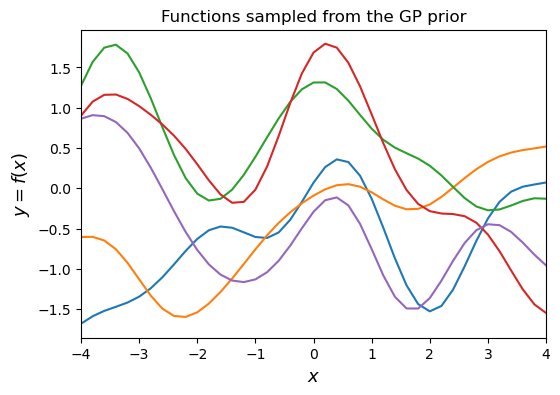

In [2]:
import scipy

# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

# Sample from the Gaussian process distribution
nb_of_samples = 41  # Number of points in each function
number_of_functions = 5  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
Σ = exponentiated_quadratic(X, X)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(nb_of_samples),
    cov=Σ, 
    size=number_of_functions
)

# Plot the sampled functions
plt.figure(figsize=(6, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i], linestyle='-', markersize=3
)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title('Functions sampled from the GP prior')
plt.xlim([-4, 4])
plt.show()